In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from datetime import date

In [58]:
start = time.process_time()

In [59]:
df = pd.read_csv("C:/Users/Shreshth Arora/Desktop/Programming/Python/Projects/infosys.csv")
df['Date'] = pd.to_datetime(df.Date)
df.index = pd.DatetimeIndex(df.Date)
table_dates = df.Date
df.drop('Date', axis=1, inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,717.049988,725.750000,715.000000,721.049988,637.257385,6455426
2019-04-23,723.900024,730.000000,718.400024,728.200012,643.576721,5516668
2019-04-24,728.200012,737.900024,724.000000,736.450012,650.867859,8285120
2019-04-25,736.450012,737.650024,727.049988,728.549988,643.885986,8005235
2019-04-26,731.000000,739.799988,729.000000,738.000000,652.237793,6895168


In [60]:
df.shape

(1235, 6)

In [61]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [62]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,717.049988,725.750000,715.000000,721.049988,637.257385,6455426
2019-04-23,723.900024,730.000000,718.400024,728.200012,643.576721,5516668
2019-04-24,728.200012,737.900024,724.000000,736.450012,650.867859,8285120
2019-04-25,736.450012,737.650024,727.049988,728.549988,643.885986,8005235
2019-04-26,731.000000,739.799988,729.000000,738.000000,652.237793,6895168


In [63]:
#Last row of data used to predict
compare_price = df.tail(1)
compare_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-19,1385.0,1426.849976,1378.75,1411.25,1403.34082,20603621


In [64]:
#Get all data except last row (actual_price)
df = df.head(len(df)-1)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,717.049988,725.750000,715.000000,721.049988,637.257385,6455426
2019-04-23,723.900024,730.000000,718.400024,728.200012,643.576721,5516668
2019-04-24,728.200012,737.900024,724.000000,736.450012,650.867859,8285120
2019-04-25,736.450012,737.650024,727.049988,728.549988,643.885986,8005235
2019-04-26,731.000000,739.799988,729.000000,738.000000,652.237793,6895168
...,...,...,...,...,...,...
2024-04-10,1500.349976,1509.849976,1484.550049,1506.800049,1498.355347,6744595
2024-04-12,1504.000000,1506.800049,1479.500000,1484.750000,1476.428833,12275616
2024-04-15,1480.000000,1491.949951,1461.050049,1468.150024,1459.921997,8531224


In [65]:
#Convert to OneHotEncoder
df = pd.get_dummies(df)

In [66]:
#Save Feature Columns
feature_list = list(df.columns)
feature_list.remove('Close')
feature_list

['Open', 'High', 'Low', 'Adj Close', 'Volume']

In [67]:
y = df.iloc[:, 3]
X = df.iloc[:, [0, 1, 2, 4, 5]]

In [68]:
#Save for Later
tab_y = y

In [69]:
y = y.values.reshape(-1,1)
print(y.shape)

(1234, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(863, 5)
(371, 5)
(863, 1)
(371, 1)


In [73]:
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
#y_test = scaler.fit_transform(y_test)

In [74]:
model = SVR(kernel='linear', C=1, gamma='auto')

In [75]:
model.fit(X_train, np.ravel(y_train))

SVR(C=1, gamma='auto', kernel='linear')

In [76]:
y_pred = model.predict(X_test)

In [77]:
actual_price = compare_price.iloc[0,3]
actual_price

1411.25

In [78]:
next_day_price = y_pred[-1]
print(next_day_price)

1052.9530563089452


In [79]:
#Model Evaluation Scores
from sklearn import metrics

print('R-squared score: ', model.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

R-squared score:  -10.165248927411726
Mean Absolute Error: 323.26405010150785
Mean Squared Error: 156485.82839697634
Root Mean Squared Error: 395.58289699755267
Mean Absolute Percentage Error (MAPE): 27.33
Accuracy: 72.67


In [80]:
dates = df.index

In [81]:
true_data =pd.DataFrame(data = {'date': dates, 'actual': tab_y})
true_data

,date,actual
Date,,
2019-04-22,2019-04-22,721.049988
2019-04-23,2019-04-23,728.200012
2019-04-24,2019-04-24,736.450012
2019-04-25,2019-04-25,728.549988
2019-04-26,2019-04-26,738.000000
...,...,...
2024-04-10,2024-04-10,1506.800049
2024-04-12,2024-04-12,1484.750000
2024-04-15,2024-04-15,1468.150024


In [82]:
test_dates = table_dates[1-(len(y_pred)+1):]

In [83]:
predictions_data = pd.DataFrame(data = {'date': test_dates, 'predictions':y_pred})
predictions_data

,date,predictions
Date,,
2022-10-17,2022-10-17,1200.957915
2022-10-18,2022-10-18,1217.327031
2022-10-19,2022-10-19,1288.239504
2022-10-20,2022-10-20,1248.568606
2022-10-21,2022-10-21,1231.789969
...,...,...
2024-04-12,2024-04-12,1319.535865
2024-04-15,2024-04-15,1295.123592
2024-04-16,2024-04-16,1232.592197


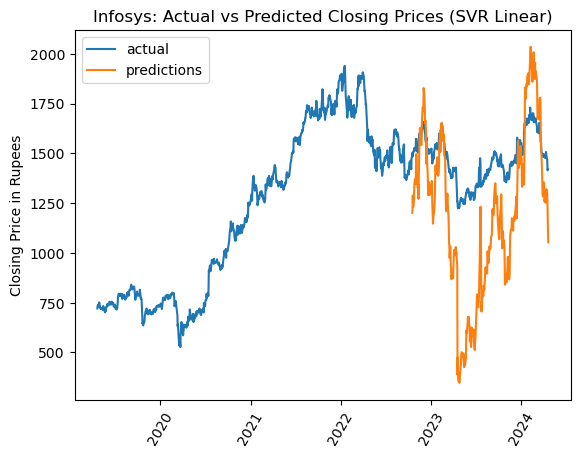

In [84]:
plt.plot(true_data['date'], true_data['actual'], label = 'actual')
plt.plot(predictions_data['date'], predictions_data['predictions'], label='predictions')
plt.xticks(rotation=60)
plt.ylabel("Closing Price in Rupees")
plt.title("Infosys: Actual vs Predicted Closing Prices (SVR Linear)")
plt.legend()
plt.show()